In [2]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Loading the data
df=pd.read_csv('dataset.csv')
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

Amount of patients without a heart disease: 35021
Amount of patients with a heart disease: 34979


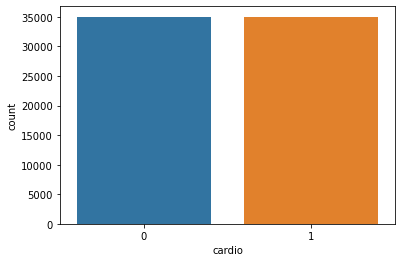

In [5]:
print('Amount of patients without a heart disease:', (df['cardio']==0).sum())
print('Amount of patients with a heart disease:', (df['cardio']==1).sum())

sns.countplot(data=df, x='cardio');

In [6]:
# Let's now identify which columns are categorical, and which are numerical.

cat_columns = df.select_dtypes(include='object').columns.tolist()
num_columns = df.select_dtypes(exclude='object').columns.tolist()

print('The categorical columns are', cat_columns)
print('The numerical columns are', num_columns)

The categorical columns are []
The numerical columns are ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [7]:
# # num_columns.remove('fasting blood sugar')
# cat_columns.append('fasting blood sugar')
# num_columns.remove('fasting blood sugar')
# cat_columns


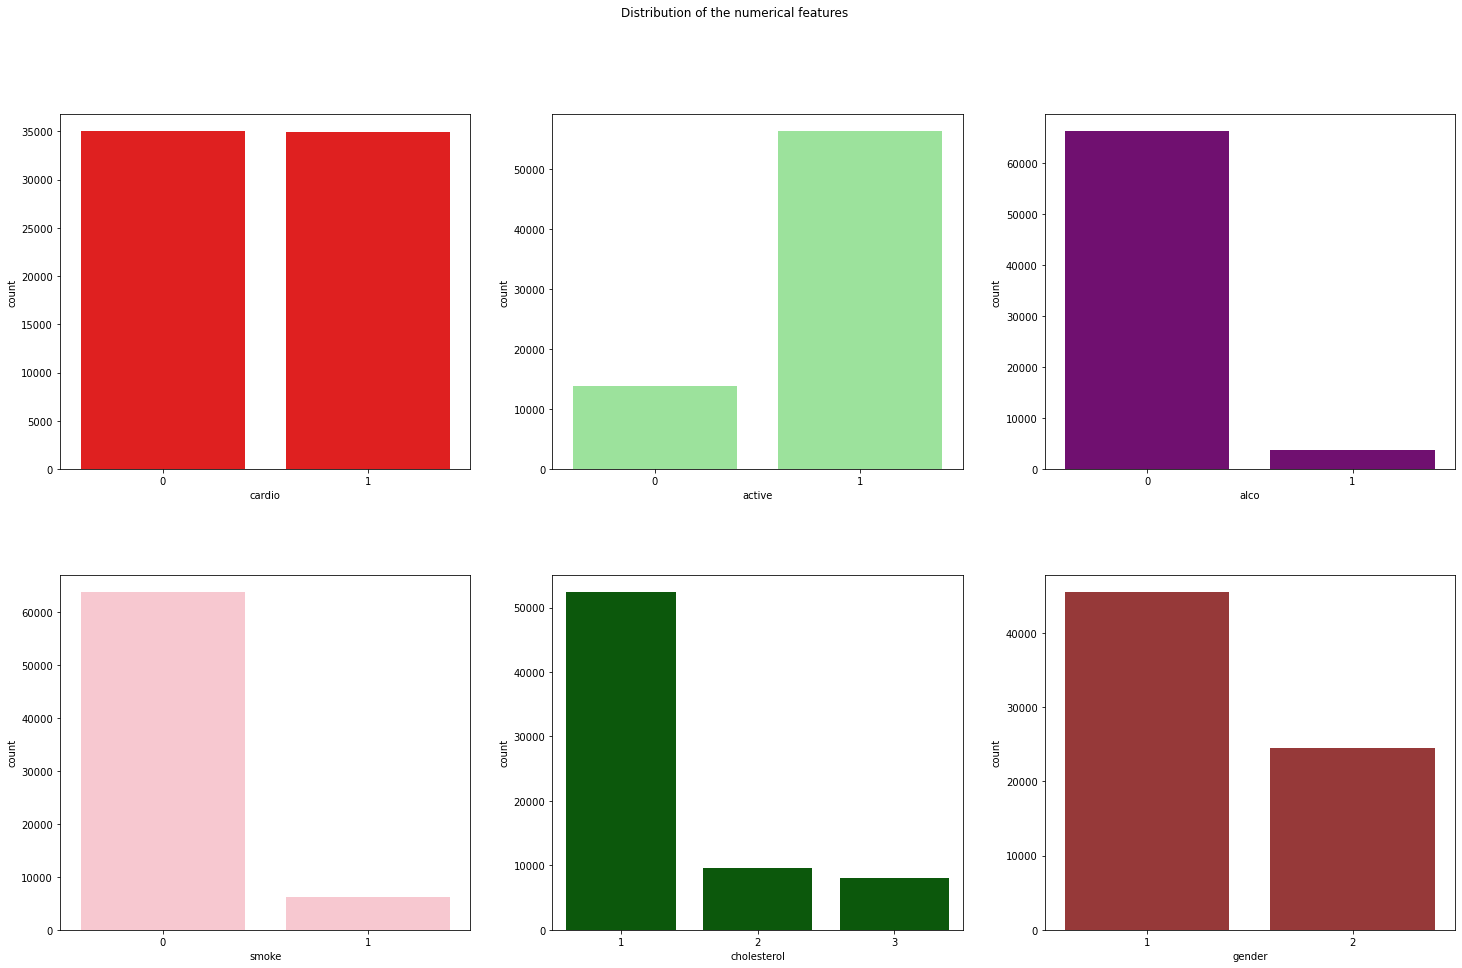

In [8]:
indexes = [ (i,j) for i in range(3) for j in range(2)]
bunch_of_colors = ['red', 'lightgreen', 'purple', 'pink', 'darkgreen', 'darkblue','orange','brown','yellow']
fig, axes = plt.subplots(2, 3, figsize=(25,15))

fig.suptitle('Distribution of the numerical features')
sns.countplot(x ='cardio', data = df,ax=axes[0,0],color=bunch_of_colors[0]) 
sns.countplot(x ='active', data = df,ax=axes[0,1],color=bunch_of_colors[1]) 
sns.countplot(x ='alco', data = df,ax=axes[0,2],color=bunch_of_colors[2]) 
sns.countplot(x ='smoke', data = df,ax=axes[1,0],color=bunch_of_colors[3]) 
sns.countplot(data=df, x='cholesterol', ax=axes[1,1],color=bunch_of_colors[4])
# sns.histplot(data=df, x='ap_hi', ax=axes[1,2],color=bunch_of_colors[5])
# ax.set_xlim(0,100)
# sns.histplot(data=df, x='age', ax=axes[2,0],color=bunch_of_colors[6])
sns.countplot(x ='gender', data = df,ax=axes[1,2],color=bunch_of_colors[7])
# sns.histplot(data=df, x='ap_lo', ax=axes[2,2],color=bunch_of_colors[8])

fig.subplots_adjust(hspace=.3)

In [9]:
max(df['ap_hi'])

16020

In [ ]:
g = sns.pairplot(df, hue="cardio", corner=True, palette = 'Set2')

g._legend.set_bbox_to_anchor((.7, .7))
g._legend.get_title().set_fontsize(20);

In [10]:
# fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# sns.histplot(ax=axes[0], data=df, x='age', hue='cardio', multiple='stack')
# axes[0].set_xlabel(xlabel='age', fontsize=18)


# sns.histplot(ax=axes[1], data=df, x='active', hue='cardio', multiple='stack')
# axes[1].set_xlabel(xlabel='active', fontsize=18);


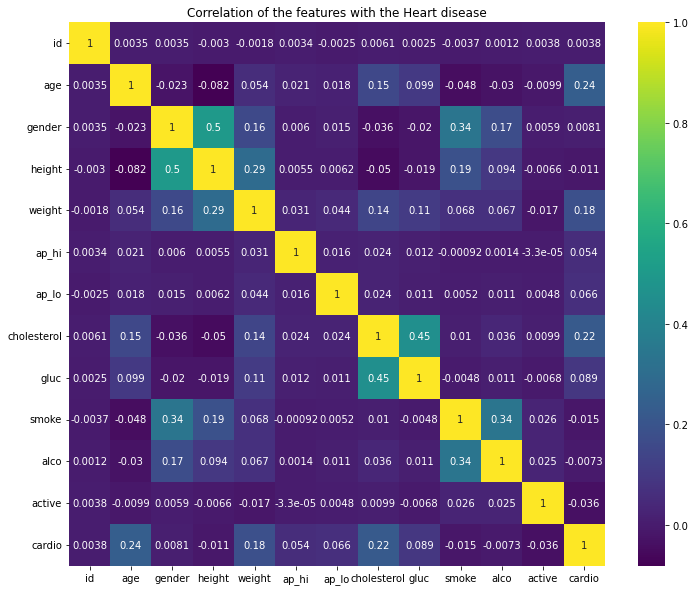

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.yticks(rotation=0)
plt.title('Correlation of the features with the Heart disease');

In [13]:
# indexes = [ (i,j) for i in range(3) for j in range(2)]

# fig, axes = plt.subplots(3, 2, figsize=(12, 16))

# fig.suptitle('Countplots from the categorical features by heart disease')

# for index, column in zip(indexes, df[num_columns].columns):
#     sns.countplot(ax=axes[index], data=df, x=df[num_columns][column], hue='cardio')
    
# fig.subplots_adjust(hspace=.3)

In [14]:
# Separating features from the target we want to predict
X = df.drop('cardio', axis=1)
y = df['cardio']

# Performing one-hot encoding for the categorical features
X = pd.get_dummies(X, drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Splitting our data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standard scaling
scaler = StandardScaler()
st_scaled_X_train = scaler.fit_transform(X_train)
st_scaled_X_test = scaler.transform(X_test)

# Normal scaling
scaler = MinMaxScaler()
normal_scaled_X_train = scaler.fit_transform(X_train)
normal_scaled_X_test = scaler.transform(X_test)

# Storing out three types of data
X_train_datasets = [X_train, st_scaled_X_train, normal_scaled_X_train]
X_test_datasets = [X_test, st_scaled_X_test, normal_scaled_X_test]

In [24]:
#model building

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

# Setting up our three logistic regression models.

lr = LogisticRegression(solver='liblinear')
lr_l1 = LogisticRegressionCV(Cs=10, cv=5, penalty='l1', solver='liblinear')
lr_l2 = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', solver='liblinear')

In [25]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

models = [lr, lr_l1, lr_l2]
precision = []
recall = []
f1_score = []
accuracy = []

for X_train_data, X_test_data in zip(X_train_datasets, X_test_datasets):
    for model in models:
        
        model.fit(X_train_data, y_train)
    
        predictions = model.predict(X_test_data)
    
        precision.append( score(y_test, predictions, average='weighted')[0] )
        recall.append( score(y_test, predictions, average='weighted')[1] )
        f1_score.append( score(y_test, predictions, average='weighted')[2] )
        accuracy.append( accuracy_score(y_test, predictions) )

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.wa

In [26]:
scores = [precision, recall, f1_score, accuracy]

df_lr = round(pd.DataFrame(scores, 
            index=['Precision', 'Recall', 'f1_score', 'Accuracy'],
            columns=['lr', 'lr_l1', 'lr_l2', 
                     'lr_st', 'lr_l1_st', 'lr_l2_st',
                     'lr_normal', 'lr_l1_normal', 'lr_l2_normal']), 3)

df_lr

,lr,lr_l1,lr_l2,lr_st,lr_l1_st,lr_l2_st,lr_normal,lr_l1_normal,lr_l2_normal
Precision,0.714,0.726,0.714,0.725,0.726,0.726,0.655,0.726,0.725
Recall,0.712,0.724,0.713,0.723,0.724,0.724,0.655,0.724,0.723
f1_score,0.712,0.723,0.713,0.723,0.723,0.723,0.655,0.723,0.723
Accuracy,0.712,0.724,0.713,0.723,0.724,0.724,0.655,0.724,0.723


In [27]:
# Our chosen logistic regression model
# And trained on data without scaling

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
predictions_lr = lr.predict(X_test)

In [28]:
# Storing the scores

df_lr = df_lr['lr'].to_frame()
df_lr

,lr
Precision,0.714
Recall,0.712
f1_score,0.712
Accuracy,0.712


In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

k = 100
accuracy_k = []

for X_train_data, X_test_data in zip(X_train_datasets, X_test_datasets):
    for k in range(1, k+1):

        knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
        knn = knn.fit(X_train_data, y_train)

        predictions = knn.predict(X_test_data)
        accuracy_pred = accuracy_score(y_test, predictions)

        accuracy_k.append(accuracy_pred)

In [ ]:
# Trained on data without scaling
plt.figure(figsize=(7,6))
plt.title('KNN trained on data without scaling')
plt.ylabel('Accuracy Score')
plt.xlabel('K value')
sns.lineplot(x=range(1, k+1), y=accuracy_k[:100]);

In [ ]:
print('max accuracy obtained:', round(max(accuracy_k[:100]), 3))

In [ ]:
# Trained on data with standard scaling
plt.figure(figsize=(7,6))
plt.title('KNN trained on data with standard scaling')
plt.ylabel('Accuracy Score')
plt.xlabel('K value')
sns.lineplot(x=range(1, k+1), y=accuracy_k[100:200]);

In [ ]:
sns.lineplot(x=range(1, k+1), y=accuracy_k[100:200], marker='o')
plt.xlim(22,26)
plt.ylim(.89,.91);

In [ ]:
# Trained on data with normal scaling
plt.figure(figsize=(7,6))
plt.title('KNN trained on data with normal scaling')
plt.ylabel('Accuracy Score')
plt.xlabel('K value')
sns.lineplot(x=range(1, k+1), y=accuracy_k[200:]);

In [ ]:
knn = KNeighborsClassifier(n_neighbors=24, weights='distance')
knn = knn.fit(st_scaled_X_train, y_train)
    
predictions_knn = knn.predict(st_scaled_X_test)

knn_scores = []

knn_scores.append( score(y_test, predictions_knn, average='weighted')[0] )
knn_scores.append( score(y_test, predictions_knn, average='weighted')[1] )
knn_scores.append( score(y_test, predictions_knn, average='weighted')[2] )
knn_scores.append( accuracy_score(y_test, predictions_knn) )

df_knn = pd.DataFrame(knn_scores, columns=['knn'],
            index=['Precision', 'Recall', 'f1_score', 'Accuracy'])

df_knn['knn'] = np.round(df_knn['knn'], 3)

df_knn

In [ ]:
# KNN classification report
from sklearn.metrics import plot_confusion_matrix, classification_report
sns.set_theme(style="white")
print(classification_report(y_test, predictions_knn))